In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# 1. Load the dataset
file_path = '/content/human_vital_signs_dataset_2024.csv'
df = pd.read_csv(file_path)

In [3]:
print("--- Dataset Loaded ---")

--- Dataset Loaded ---


In [4]:
# 2. Preprocessing: Select relevant columns
selected_cols = [
    'Heart Rate', 'Body Temperature', 'Oxygen Saturation',
    'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age',
    'Gender', 'Weight (kg)', 'Height (m)', 'Derived_BMI', 'Risk Category'
]
df = df[selected_cols]

In [5]:
# 3. Handle Categorical Data: Label Encoding
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

In [6]:
le_risk = LabelEncoder()
df['Risk Category'] = le_risk.fit_transform(df['Risk Category'])

In [7]:
# 4. Define Features (X) and Target (y)
X = df.drop('Risk Category', axis=1)
y = df['Risk Category']

In [8]:
# 5. Split the data into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [9]:
# 6. Feature Scaling: Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print("--- Preprocessing and Scaling Completed ---")

--- Preprocessing and Scaling Completed ---


In [12]:
# 7. Model Building: Gradient Boosting (Boosting Algorithm)
# Gradient Boosting often provides higher accuracy than Random Forest by correcting errors sequentially.
boost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=25)
boost_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=25)

In [13]:
# 8. Model Prediction and Evaluation
y_pred = boost_model.predict(X_test_scaled)

In [14]:
print("\n--- Boosting Model Evaluation Results ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_risk.classes_))


--- Boosting Model Evaluation Results ---
Accuracy Score: 100.00%

Classification Report:
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     20919
    Low Risk       1.00      1.00      1.00     19085

    accuracy                           1.00     40004
   macro avg       1.00      1.00      1.00     40004
weighted avg       1.00      1.00      1.00     40004




Confusion Matrix saved as 'confusion_matrix.png'


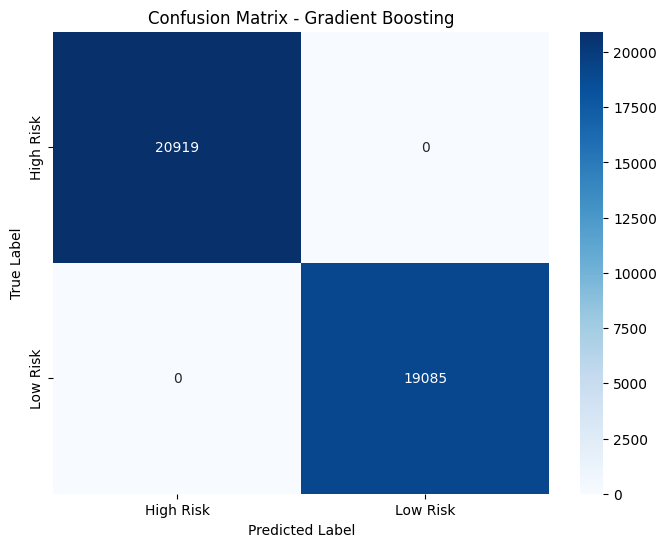

In [15]:
# 9. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_risk.classes_,
            yticklabels=le_risk.classes_)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')  # Saves the matrix as an image file
print("\nConfusion Matrix saved as 'confusion_matrix.png'")

In [16]:
# 10. Save the final preprocessed data
X_full_scaled = scaler.fit_transform(X)
df_final = pd.DataFrame(X_full_scaled, columns=X.columns)
df_final['Risk Category'] = y.values
df_final.to_csv('preprocessed_vital_signs_boosted.csv', index=False)

In [17]:
# ---------------------------------------------------------
# 11. Prediction Part: Predict Risk for New Input Values
# ---------------------------------------------------------

def predict_patient_risk(hr, temp, oxygen, sbp, dbp, age, gender, weight, height, bmi):
    """
    Takes individual patient values and returns the Predicted Risk Category.
    """
    # 1. Create a DataFrame for the input to match the training format
    new_sample = pd.DataFrame([[hr, temp, oxygen, sbp, dbp, age, gender, weight, height, bmi]],
                              columns=X.columns)

    # 2. Apply Label Encoding to Gender (Male/Female -> 0/1)
    # Note: It uses the 'le_gender' already fitted in Step 3
    new_sample['Gender'] = le_gender.transform(new_sample['Gender'])

    # 3. Apply Standard Scaling
    # Note: It uses the 'scaler' already fitted in Step 6
    new_sample_scaled = scaler.transform(new_sample)

    # 4. Make Prediction using the Boosting Model
    prediction_id = boost_model.predict(new_sample_scaled)

    # 5. Inverse Transform to get the string label (e.g., 'High Risk')
    result = le_risk.inverse_transform(prediction_id)

    return result[0]

# --- Example Usage ---
# You can change these values to test different scenarios
print("\n--- Testing Prediction with Manual Input ---")

test_hr = 98           # Heart Rate
test_temp = 38.5       # Body Temperature
test_oxygen = 94.0     # Oxygen Saturation
test_sbp = 145         # Systolic BP
test_dbp = 95          # Diastolic BP
test_age = 55          # Age
test_gender = 'Male'   # Gender ('Male' or 'Female')
test_weight = 105.0    # Weight in kg
test_height = 1.70     # Height in meters
test_bmi = 36.3        # Derived BMI

prediction = predict_patient_risk(test_hr, test_temp, test_oxygen, test_sbp,
                                  test_dbp, test_age, test_gender,
                                  test_weight, test_height, test_bmi)

print(f"Input Data: HR={test_hr}, BMI={test_bmi}, Age={test_age}, Gender={test_gender}")
print(f"Predicted Result: {prediction}")


--- Testing Prediction with Manual Input ---
Input Data: HR=98, BMI=36.3, Age=55, Gender=Male
Predicted Result: High Risk
